In [20]:
import numpy as np

from matplotlib.pyplot import figure
import matplotlib.pyplot as plt

y = np.load('RNN/RNN_SGD_model=RNN_optimizer=SGD_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0/learning_curves.npy')[()]


In [60]:
def plotcurves1(path):
    y=np.load(path + '/learning_curves.npy')
    plt.figure(figsize=(10,5))
    # Plot training and validation curve
    x = range(0, 40)
    plt.plot(x, y['train_ppls'], label='train')
    plt.plot(x, y['val_ppls'], label='valid')

    plt.xlabel('epoch')
    plt.ylabel('PPL')
    plt.legend()

    plt.show()

In [67]:
# def plotcurves2(path):
# #     file=np.load(path + '/log.txt')
#     log = pandas.read_csv(path + "/log.txt", header=None, delimiter='\t')
#     x2 = (log[4].str.extract('(\d+.\d+)').astype(float)).cumsum()
    
#     plt.figure(figsize=(10,5))
#     # Plot training and validation curve
#     x = range(0, 40)
#     plt.plot(x2, y['train_ppls'], label='train')
#     plt.plot(x2, y['val_ppls'], label='valid')

#     plt.xlabel('time (sec)')
#     plt.ylabel('PPL')
#     plt.legend()

#     plt.show()

In [306]:
def plotcurves3(path, i, model):
    y=np.load(path + '/learning_curves.npy')[()]

    index = path.find('zer=')+4
    name = str(i) + '_' + path[index:]
    name2 = model + str(i)
    
    print(name2)
    
    fig=plt.figure(figsize=(16, 6))
    
#     plt.figure(figsize=(10,5))
    # Plot training and validation curve
    x = range(0, 40)
    
    fig.add_subplot(1,2,1)
    plt.plot(x, y['train_ppls'], label='train')
    plt.plot(x, y['val_ppls'], label='valid')

    plt.xlabel('epoch')
    plt.ylabel('PPL')
    plt.legend()
    
    fig.add_subplot(1,2,2)
    log = pandas.read_csv(path + "/log.txt", header=None, delimiter='\t')
    x2 = (log[4].str.extract('(\d+.\d+)').astype(float)).cumsum()/60
    
    # Plot training and validation curve
    x = range(0, 40)
    plt.plot(x2, y['train_ppls'], label='train')
    plt.plot(x2, y['val_ppls'], label='valid')

    plt.xlabel('time (min)')
    plt.ylabel('PPL')
    plt.legend()

#     plt.show()
    fig.savefig(name2 + '.png')
    
    y2 = np.asarray(y['val_ppls'])
    y3 = np.asarray(y['train_ppls'])
    min_train = (min(y3))
    min_val = (min(y2))
    min_epoch = np.argmin(y2)
    min_time = x2.at[min_epoch, 0]
    total_time = x2.at[39, 0]    
    results = (name, min_train, min_val, min_epoch, min_time, total_time)

    print (results)
    return results

    

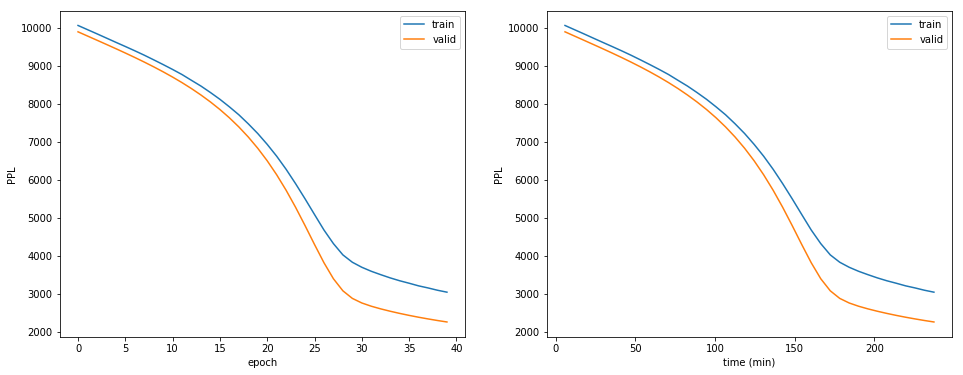

('SGD_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0', 2254.2748582660897, 39, 237.33861436049145, 237.33861436049145)


In [222]:
_ = plotcurves3('RNN/RNN_SGD_model=RNN_optimizer=SGD_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0')

# print(min_val)
# print(min_epoch)
# print(min_time)
# print(tt)


In [304]:
_ = plotcurves3('RNN/RNN_SGD_model=RNN_optimizer=SGD_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0')


TypeError: plotcurves3() missing 2 required positional arguments: 'i' and 'model'

In [162]:
def plotcurves4(path):
    y=(np.load(path + '/learning_curves.npy'))[()]
    return y

In [163]:
y = plotcurves4('RNN/RNN_SGD_model=RNN_optimizer=SGD_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0')



('1_SGD_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0', 3039.0378085693014, 2254.2748582660897, 39, 237.33861436049145, 237.33861436049145)
('2_ADAM_initial_lr=0.0001_batch_size=100_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0', 155.40318334788253, 156.70078517134118, 39, 90.69028274615606, 90.69028274615606)
('3_ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_emb_size=1000_0', 82.04260678778203, 136.5054149482554, 24, 257.95480223496753, 403.7659636298815)
('4_ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=1.0_0', 4.5849072599200955, 172.29753503210725, 6, 52.97056886752446, 302.6127178668976)
('5_SGD_LR_SCHEDULE_initial_lr=1_batch_size=20_seq_len=35_hidden_size=512_num_layers=2_dp_keep_prob=0.35_0', 230.48847040210933, 197.2593631742241, 26, 69.66592282454172, 103.23024215698243)
('6_ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_

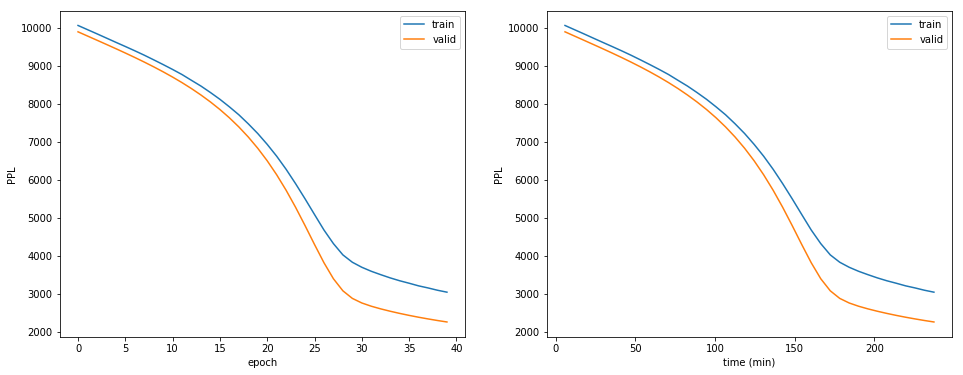

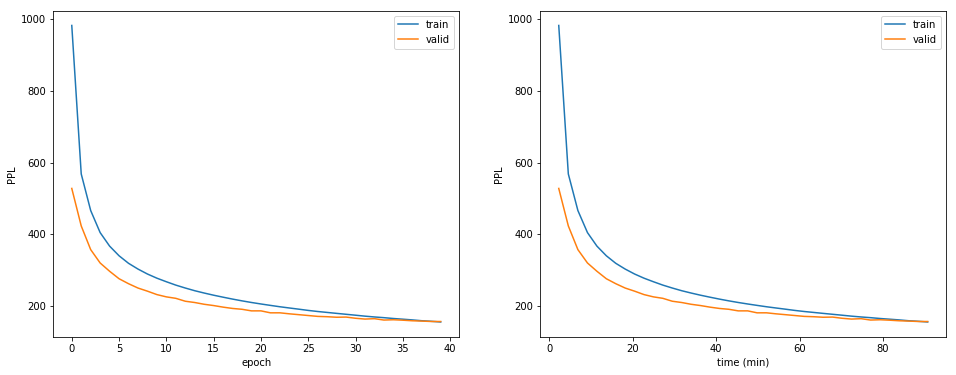

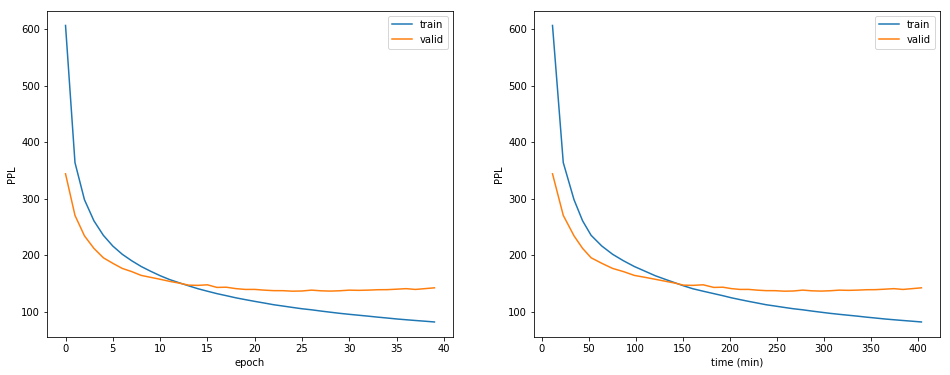

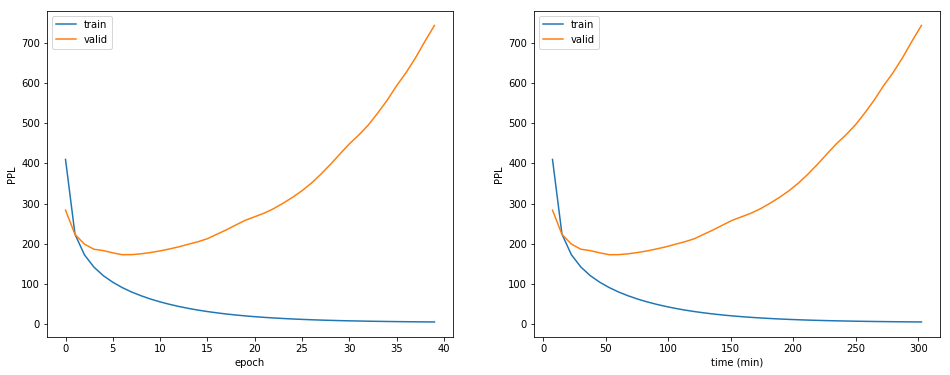

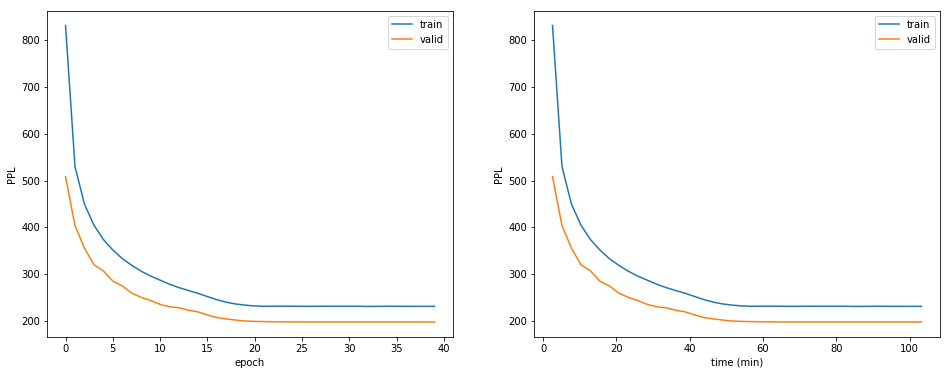

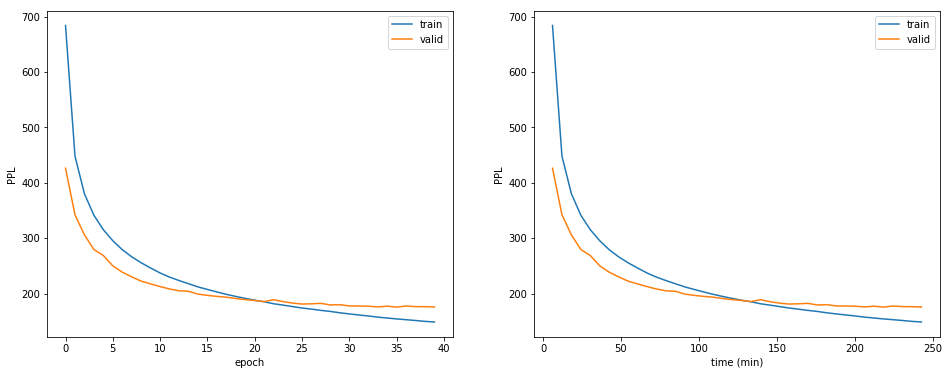

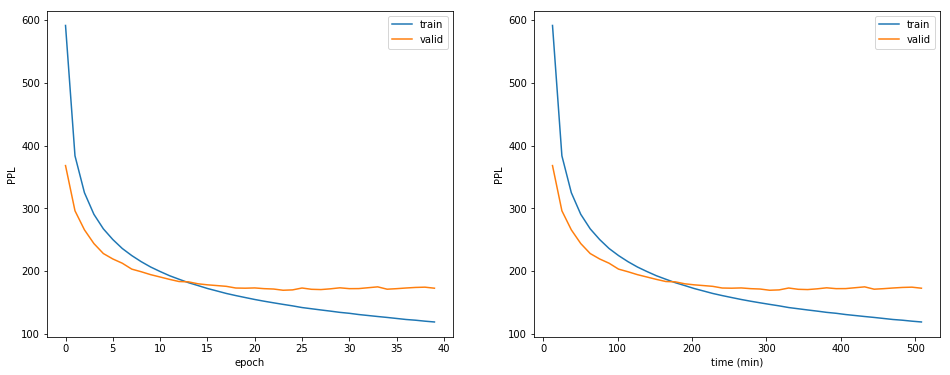

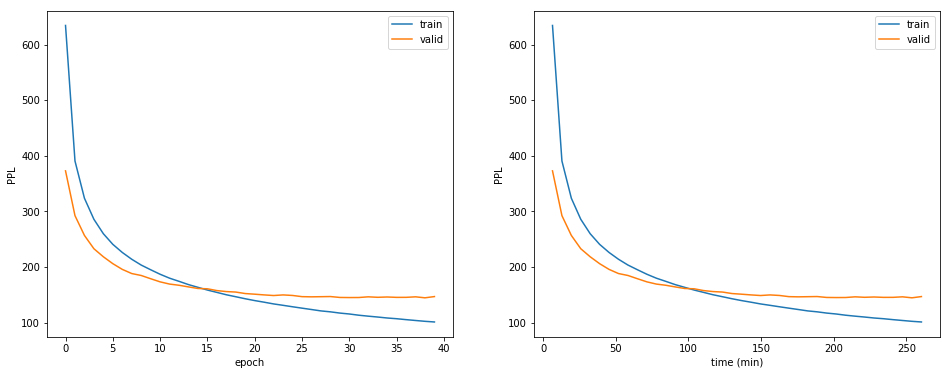

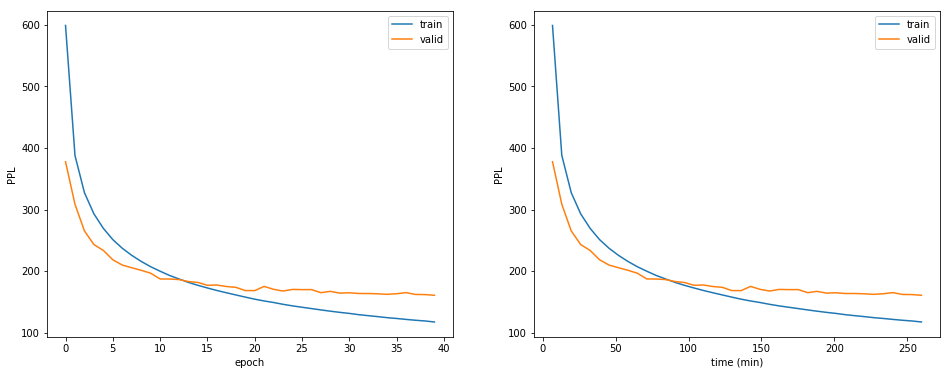

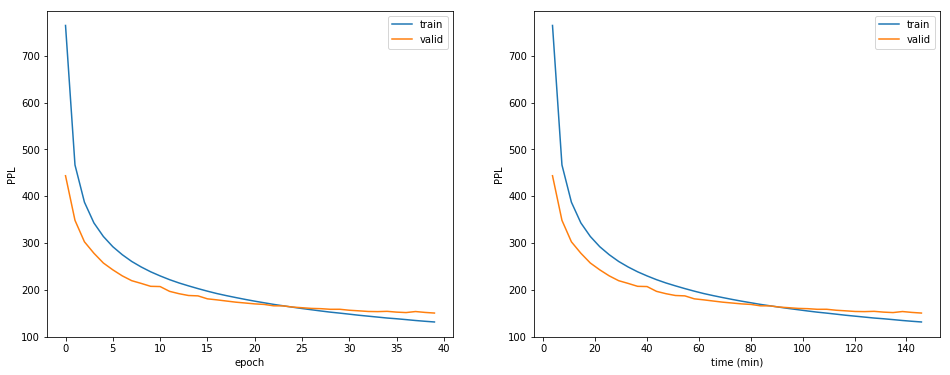

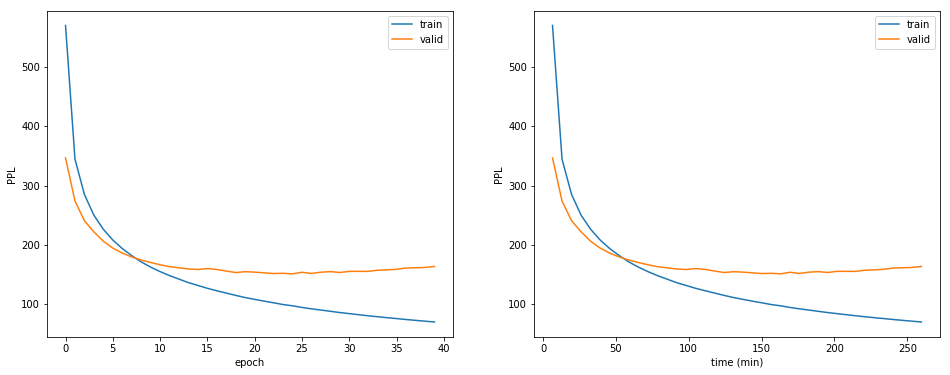

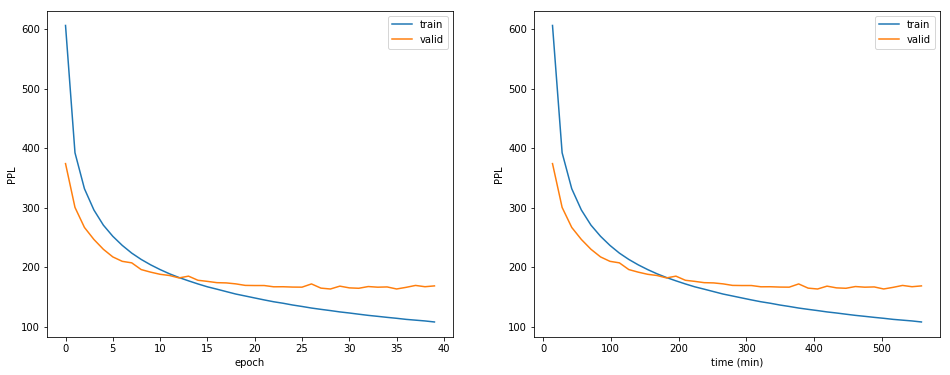

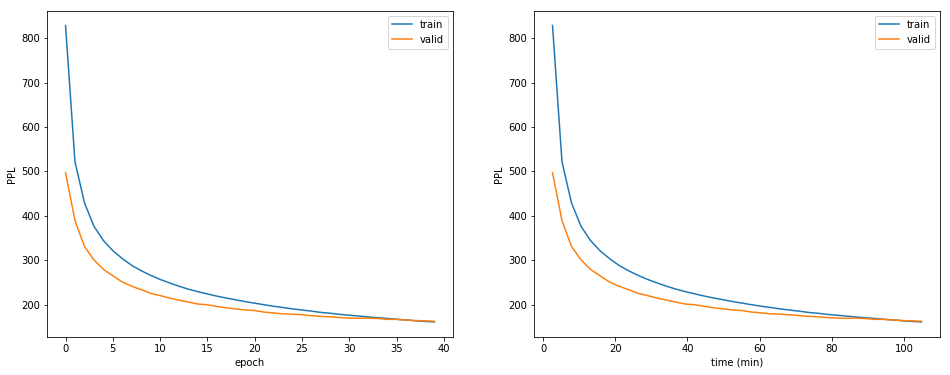

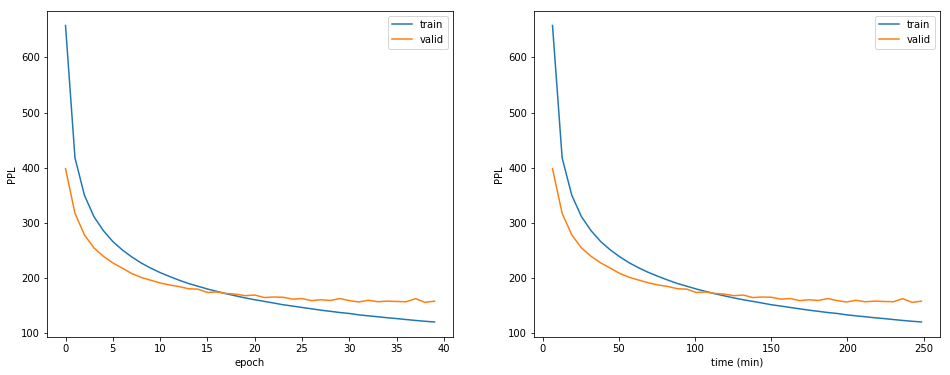

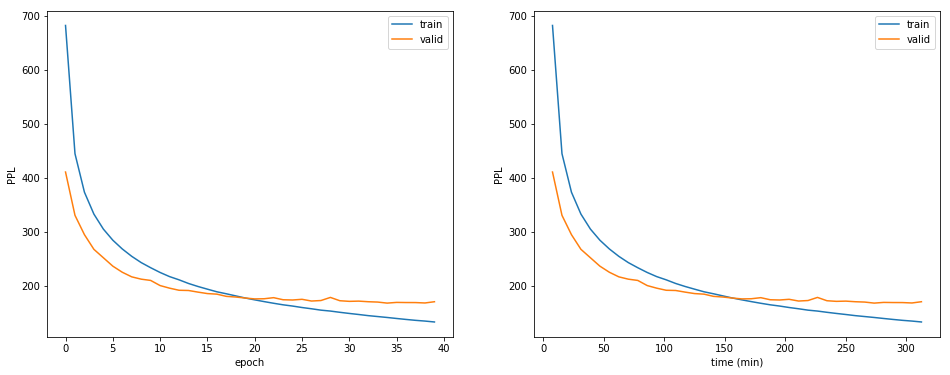

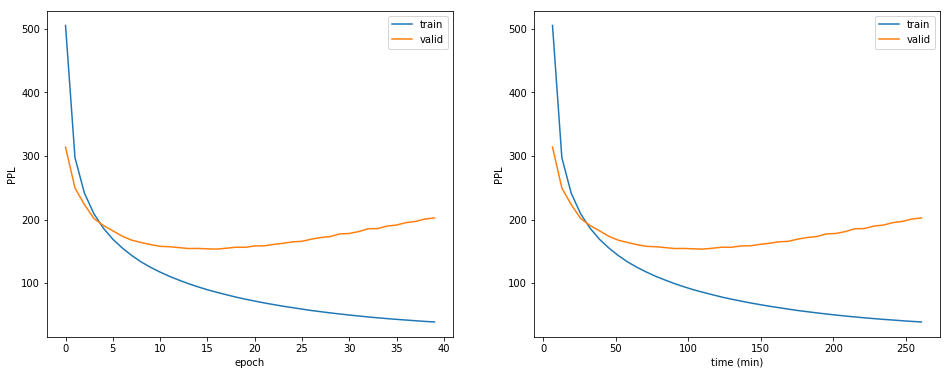

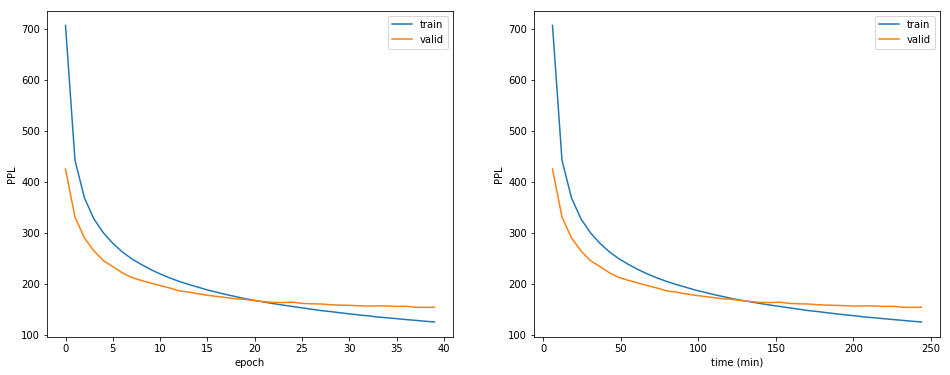

In [245]:
import os
directory = 'rnn/'

results=[]
index = 1
for directory in os.listdir(directory):
    if directory[0] is not ("."):
#         print (directory)
        tmp = plotcurves3('rnn/' + directory, index, "RNN")
        index += 1
        results.append(tmp)



GRU1
('1_ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0', 59.94628744759056, 111.12707312654267, 33, 394.19564199844996, 463.9881305495898)
GRU2
('2_SGD_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0', 50.176074737744955, 113.51360517900758, 21, 250.349265507857, 455.04342966079713)
GRU3
('3_SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0', 65.37418685542725, 102.77086768754751, 27, 319.7373754461606, 454.15290582180023)
GRU4
('4_SGD_LR_SCHEDULE_initial_lr=10_batch_size=100_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0', 94.77757766107607, 113.30292738489902, 23, 90.70943576097488, 151.1781807422638)
GRU5
('5_SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=50_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0', 67.75774668913544, 103.56930840768804, 27, 374.2750242590904, 535.1010128736496)
GRU6
('6_SGD_LR_SCHE

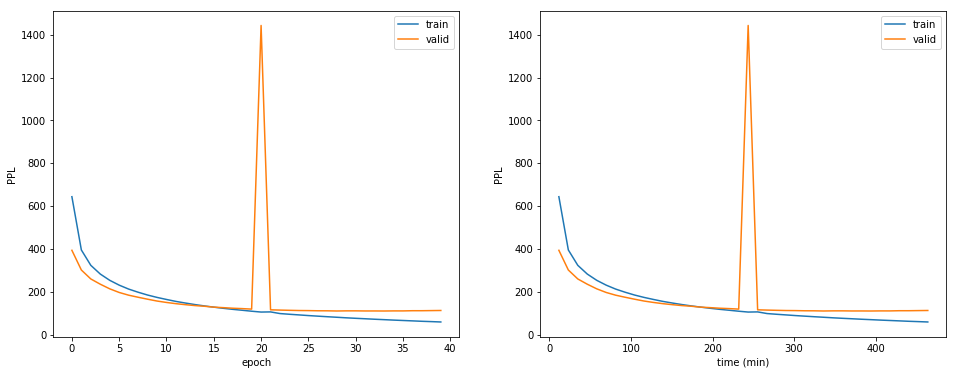

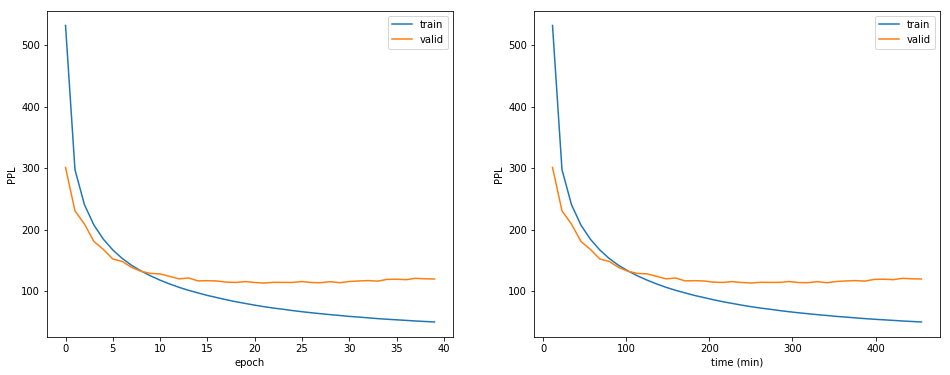

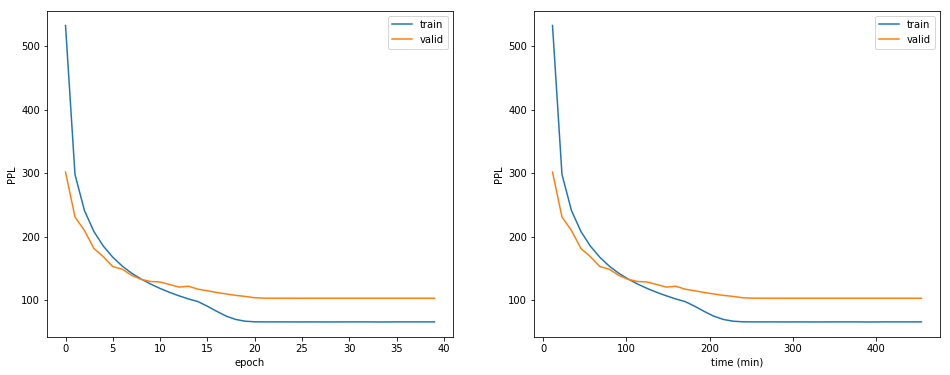

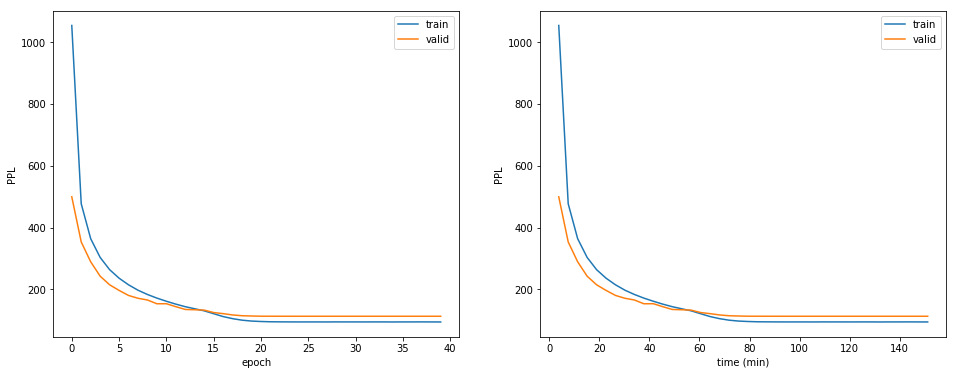

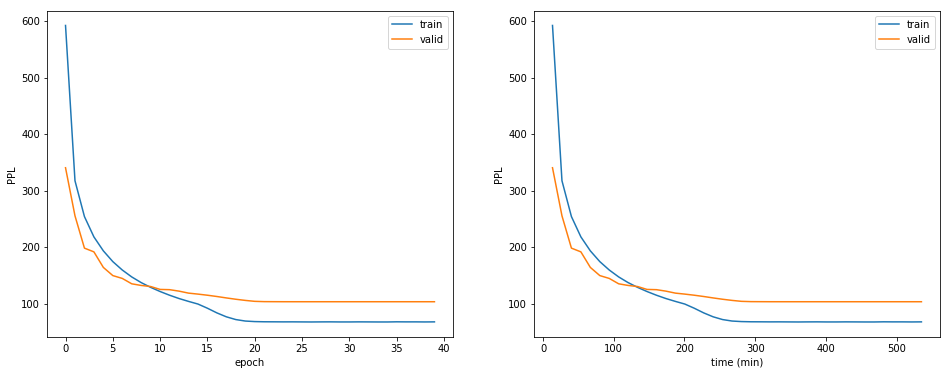

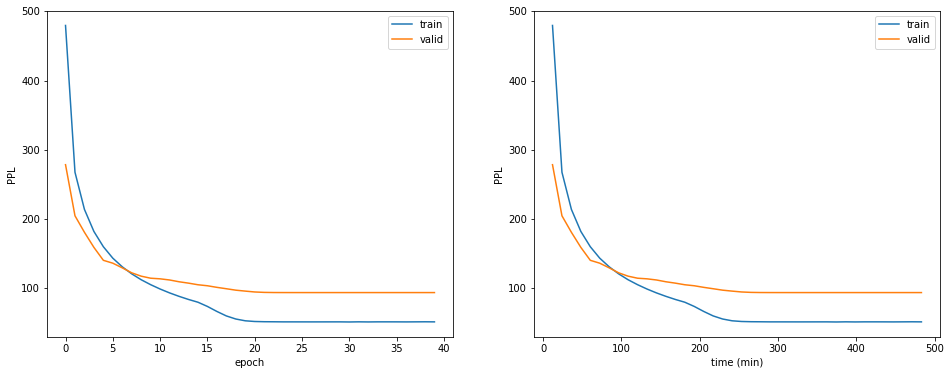

In [308]:
directory = 'GRU/'

results=[]
index = 1
for directory in sorted(os.listdir(directory)):
    if directory[0] is not ("."):
#         print (directory)
        tmp = plotcurves3('GRU/' + directory, index, "GRU")
        index += 1
        results.append(tmp)

TF13
('13_SGD_LR_SCHEDULE_initial_lr=20_batch_size=128_seq_len=35_hidden_size=512_num_layers=6_dp_keep_prob=0.9', 67.79636467240597, 146.1608478850067, 29, 53.416462270418805, 71.1852210799853)
TF14
('14_SGD_initial_lr=20_batch_size=128_seq_len=35_hidden_size=512_num_layers=6_dp_keep_prob=.9', 27.52516495812204, 172.815977127858, 26, 48.06583449045817, 71.15224168697993)
TF15
('15_ADAM_initial_lr=0.001_batch_size=128_seq_len=35_hidden_size=512_num_layers=2_dp_keep_prob=.9', 3.1451563516683287, 131.53722551166786, 2, 2.5561493754386904, 33.97801894346873)
TF16
('16_ADAM_initial_lr=0.001_batch_size=128_seq_len=35_hidden_size=512_num_layers=2_dp_keep_prob=.7_save_best_0', 12.002155463345474, 142.66630989324278, 3, 3.4117369174957277, 33.98677449623744)
TF17
('17_ADAM_initial_lr=0.0001_batch_size=128_seq_len=35_hidden_size=512_num_layers=2_dp_keep_prob=.7_save_best_0', 41.23317253829912, 133.49821266400787, 23, 22.117967251936594, 36.81929378509521)
TF18
('18_ADAM_initial_lr=0.0001_batch_s

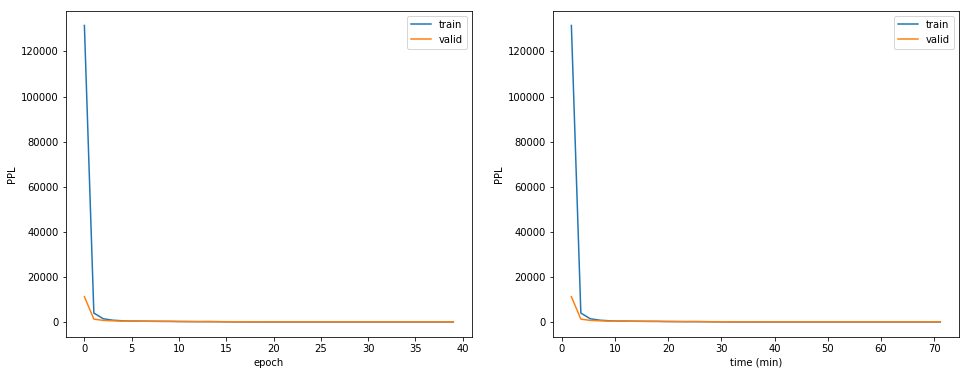

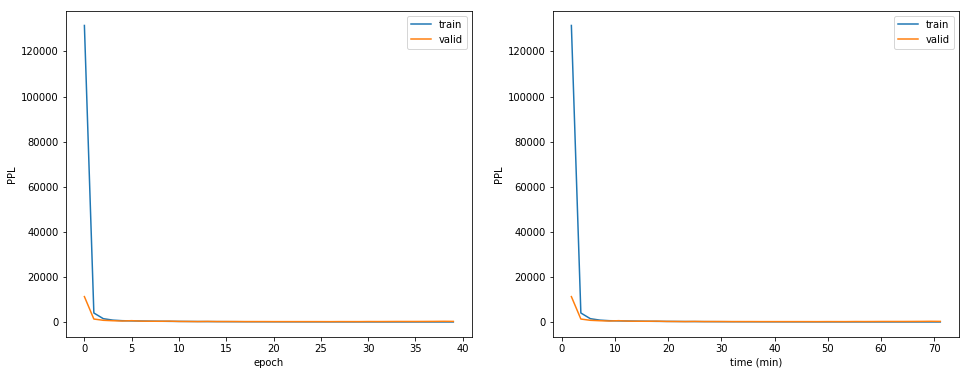

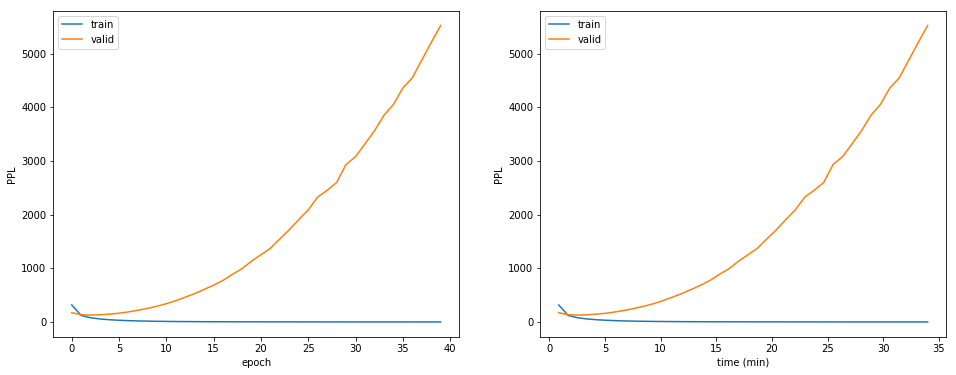

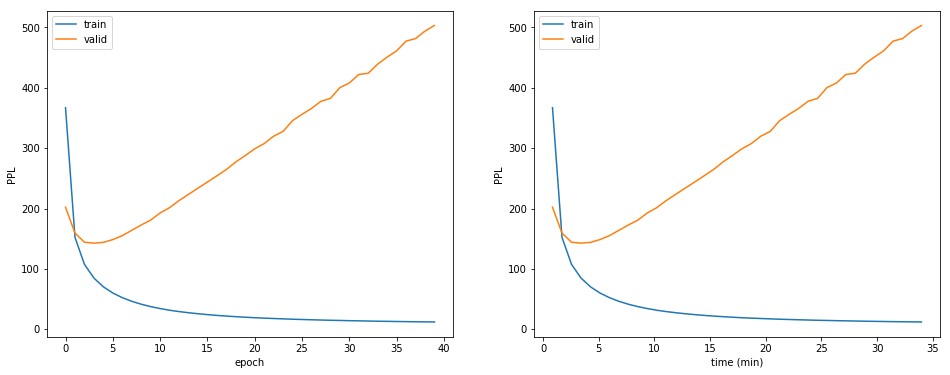

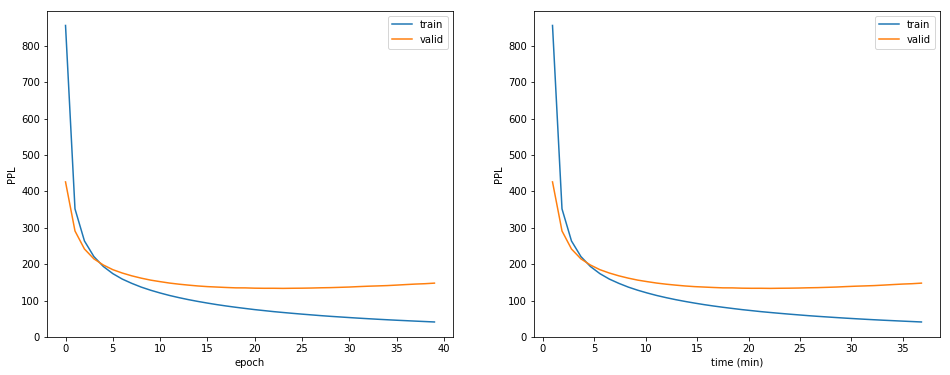

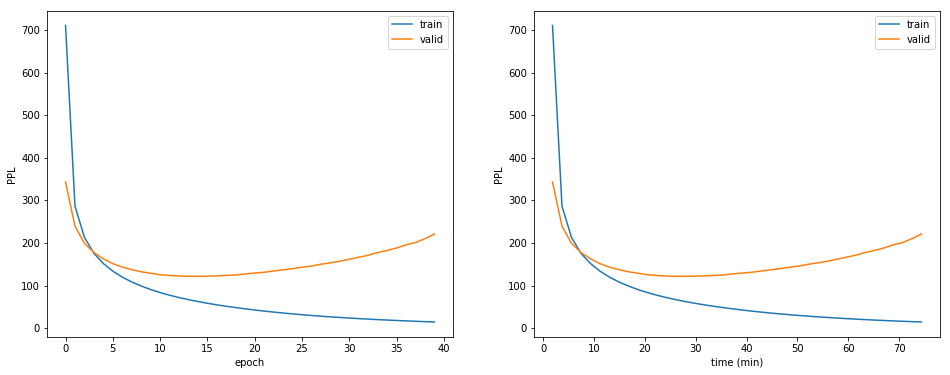

In [372]:
directory = 'TRANSFORMER/'

results=[]
index = 1
for path in sorted(os.listdir(directory)):
    if path[0] is not ("."):
#         print (directory)
        tmp = plotcurves3('TRANSFORMER/' + path, path[:2], "TF")
        index += 1
        results.append(tmp)

In [373]:
pd = pandas.DataFrame(results)

In [374]:
tf = pd.to_csv (r'tf.csv', index = None, header=True) 

In [134]:
test = np.load('RNN/RNN_SGD_model=RNN_optimizer=SGD_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0/learning_curves.npy')[()]


In [421]:
def plotModel(directory, savefile):
    
    fig=plt.figure(figsize=(8, 6))
    x = range(0, 40)

    index = 1
    for path in sorted(os.listdir(directory)):
        if path[0] is not ("."):
            index += 1
            y=np.load(directory + path + '/learning_curves.npy')[()]
            
            plt.axes(ylim=(50,500))  # GRU  100, 600
            plt.plot(x, y['val_ppls'], label=path[:2])

            plt.xlabel('epoch')
            plt.ylabel('PPL')
            plt.legend()


    plt.show()
    fig.savefig(savefile)
    


 1_RNN_SGD_model=RNN_optimizer=SGD_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0
 2_RNN_SGD_LR_SCHEDULE_model=RNN_optimizer=SGD_LR_SCHEDULE_initial_lr=1_batch_size=20_seq_len=35_hidden_size=512_num_layers=2_dp_keep_prob=0.35_0
 3_RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0
 4_RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=50_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0
 5_RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=40_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0
 6_RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_emb_size=1000_0


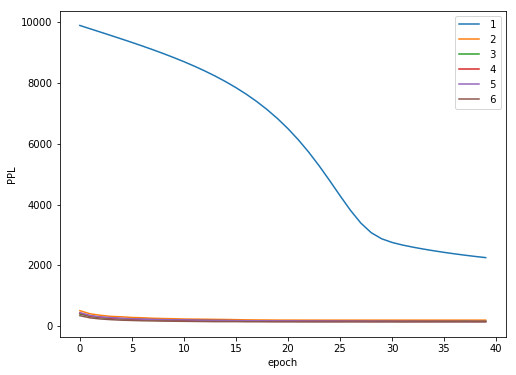

In [362]:
plotModel('RNN/', 'rnn2.png')

 8_GRU_SGD_model=GRU_optimizer=SGD_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0
 9_GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0
10_GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=100_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0
11_GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=50_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0
12_GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_emb_size=1000_0


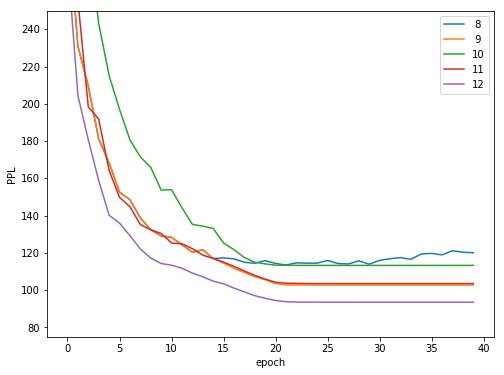

In [358]:
plotModel('GRU/', 'gru2b.png')


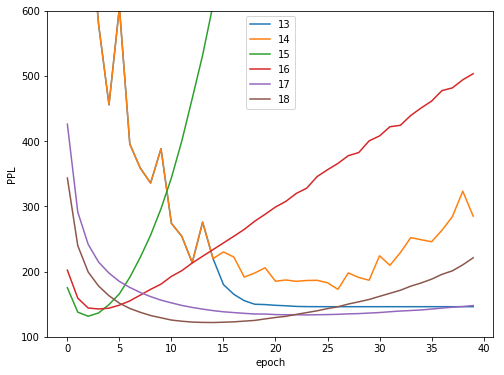

In [381]:
plotModel('TRANSFORMER/', 'tf2.png')

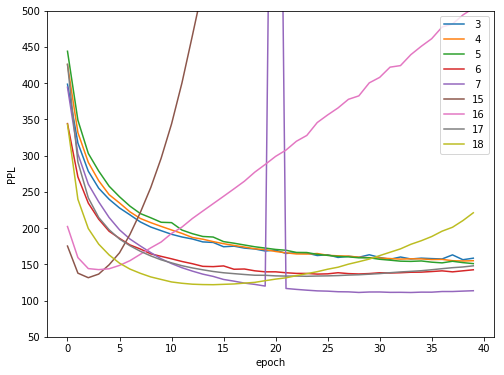

In [422]:
plotModel(' optim/', 'ADAM2.png')

In [425]:
def plotModel2(directory, savefile):
    
    fig=plt.figure(figsize=(8, 6))
    x = range(0, 40)

    index = 1
    for path in sorted(os.listdir(directory)):
        if path[0] is not ("."):

            index += 1
                
            print(path)
            y=np.load(directory + path + '/learning_curves.npy')[()]

            log = pandas.read_csv(directory + path + "/log.txt", header=None, delimiter='\t')
            x2 = (log[4].str.extract('(\d+.\d+)').astype(float)).cumsum()/60

            # Plot training and validation curve
#             plt.axes(ylim=(75,250)) # for GRU
#             plt.axes(ylim=(100,600)) # for tf
            plt.axes(ylim=(50,500))
            plt.plot(x2, y['val_ppls'], label=path[:2])

            plt.xlabel('time (min)')
            plt.ylabel('PPL')
            plt.legend()

    plt.show()
    fig.savefig(savefile)
    

    

 1_RNN_SGD_model=RNN_optimizer=SGD_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0
 2_RNN_SGD_LR_SCHEDULE_model=RNN_optimizer=SGD_LR_SCHEDULE_initial_lr=1_batch_size=20_seq_len=35_hidden_size=512_num_layers=2_dp_keep_prob=0.35_0
 3_RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0
 4_RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=50_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0
 5_RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=40_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0
 6_RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_emb_size=1000_0


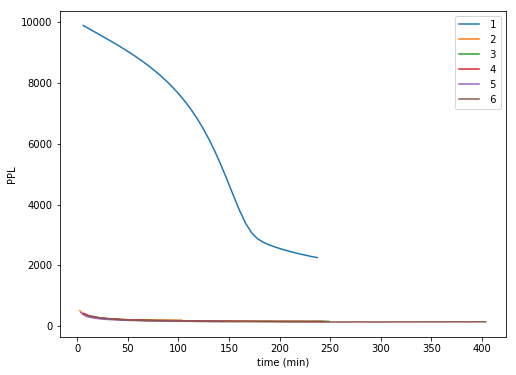

In [365]:
plotModel2('RNN/', 'rnn_time.png')

 8_GRU_SGD_model=GRU_optimizer=SGD_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0
 9_GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0
10_GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=100_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0
11_GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=50_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0
12_GRU_SGD_LR_SCHEDULE_model=GRU_optimizer=SGD_LR_SCHEDULE_initial_lr=10_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_emb_size=1000_0


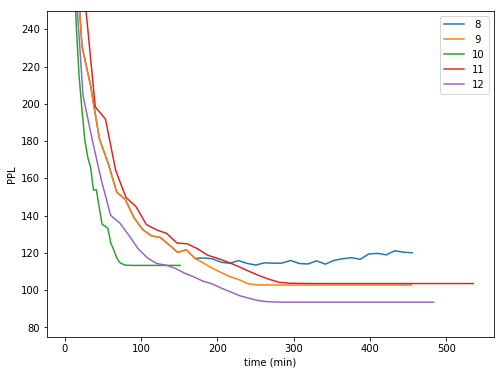

In [356]:
plotModel2('GRU/', 'gru2_time.png')

13_TRANSFORMER_model=TRANSFORMER_optimizer=SGD_LR_SCHEDULE_initial_lr=20_batch_size=128_seq_len=35_hidden_size=512_num_layers=6_dp_keep_prob=0.9
14_TRANSFORMER_model=TRANSFORMER_optimizer=SGD_initial_lr=20_batch_size=128_seq_len=35_hidden_size=512_num_layers=6_dp_keep_prob=.9
15_TRANSFORMER_ADAM_model=TRANSFORMER_optimizer=ADAM_initial_lr=0.001_batch_size=128_seq_len=35_hidden_size=512_num_layers=2_dp_keep_prob=.9
16_TRANSFORMER_ADAM_model=TRANSFORMER_optimizer=ADAM_initial_lr=0.001_batch_size=128_seq_len=35_hidden_size=512_num_layers=2_dp_keep_prob=.7_save_best_0
17_TRANSFORMER_ADAM_model=TRANSFORMER_optimizer=ADAM_initial_lr=0.0001_batch_size=128_seq_len=35_hidden_size=512_num_layers=2_dp_keep_prob=.7_save_best_0
18_TRANSFORMER_ADAM_model=TRANSFORMER_optimizer=ADAM_initial_lr=0.0001_batch_size=128_seq_len=35_hidden_size=512_num_layers=6_dp_keep_prob=.9_0


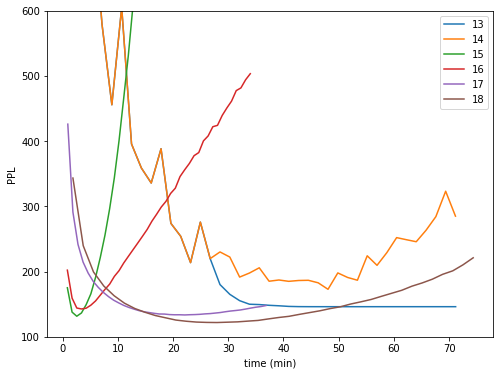

In [384]:
plotModel2('TRANSFORMER/', 'tf_time2.png')

 3_RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_save_best_0
 4_RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=50_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0
 5_RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=40_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0
 6_RNN_ADAM_model=RNN_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_emb_size=1000_0
 7_GRU_ADAM_model=GRU_optimizer=ADAM_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0
15_TRANSFORMER_ADAM_model=TRANSFORMER_optimizer=ADAM_initial_lr=0.001_batch_size=128_seq_len=35_hidden_size=512_num_layers=2_dp_keep_prob=.9
16_TRANSFORMER_ADAM_model=TRANSFORMER_optimizer=ADAM_initial_lr=0.001_batch_size=128_seq_len=35_hidden_size=512_num_layers=2_dp_keep_prob=.7_save_best_0
17_TRANSFORMER_ADAM_model=TRANSF

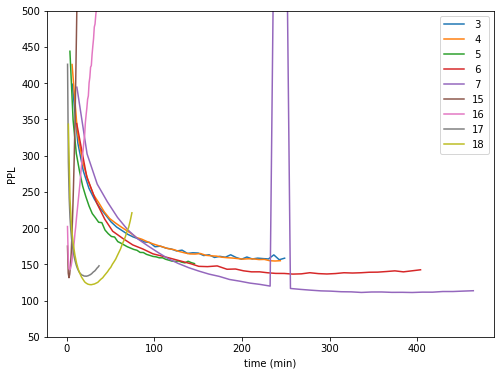

In [426]:
plotModel2(' optim/', 'ADAM_time2.png')

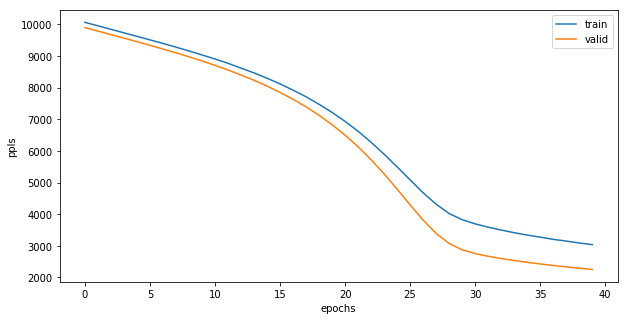

In [103]:


plt.figure(figsize=(10,5))
# Plot training and validation curve
x = range(0, 40)
plt.plot(x, y['train_ppls'], label='train')
plt.plot(x, y['val_ppls'], label='valid')

plt.xlabel('epochs')
plt.ylabel('ppls')
plt.legend()

plt.show()


In [35]:
import pandas

log = pandas.read_csv("RNN/RNN_SGD_model=RNN_optimizer=SGD_initial_lr=0.0001_batch_size=20_seq_len=35_hidden_size=1500_num_layers=2_dp_keep_prob=0.35_0/log.txt", header=None, delimiter='\t')

In [176]:
log[4]

0      time (s) spent in epoch: 353.3383078575134
1      time (s) spent in epoch: 353.2396790981293
2      time (s) spent in epoch: 353.3025732040405
3      time (s) spent in epoch: 353.6913526058197
4     time (s) spent in epoch: 355.50464701652527
5      time (s) spent in epoch: 355.4422562122345
6      time (s) spent in epoch: 355.3144636154175
7     time (s) spent in epoch: 355.17821645736694
8     time (s) spent in epoch: 355.01885509490967
9      time (s) spent in epoch: 355.0510799884796
10     time (s) spent in epoch: 354.9040496349335
11     time (s) spent in epoch: 354.8883023262024
12    time (s) spent in epoch: 354.91088914871216
13     time (s) spent in epoch: 354.9607148170471
14     time (s) spent in epoch: 357.2067286968231
15     time (s) spent in epoch: 358.3556070327759
16    time (s) spent in epoch: 358.28806805610657
17     time (s) spent in epoch: 358.3362863063812
18     time (s) spent in epoch: 358.4573287963867
19    time (s) spent in epoch: 358.53798270225525


In [177]:
x2 = (log[4].str.extract('(\d+.\d+)').astype(float)).cumsum()/60

In [191]:
x2.at[, 0]

59.08469051917394

In [54]:
x3 = x2.cumsum()

In [55]:
x3

,0
0,353.338308
1,706.577987
2,1059.880560
3,1413.571913
4,1769.076560
5,2124.518816
6,2479.833280
7,2835.011496
8,3190.030351
9,3545.081431


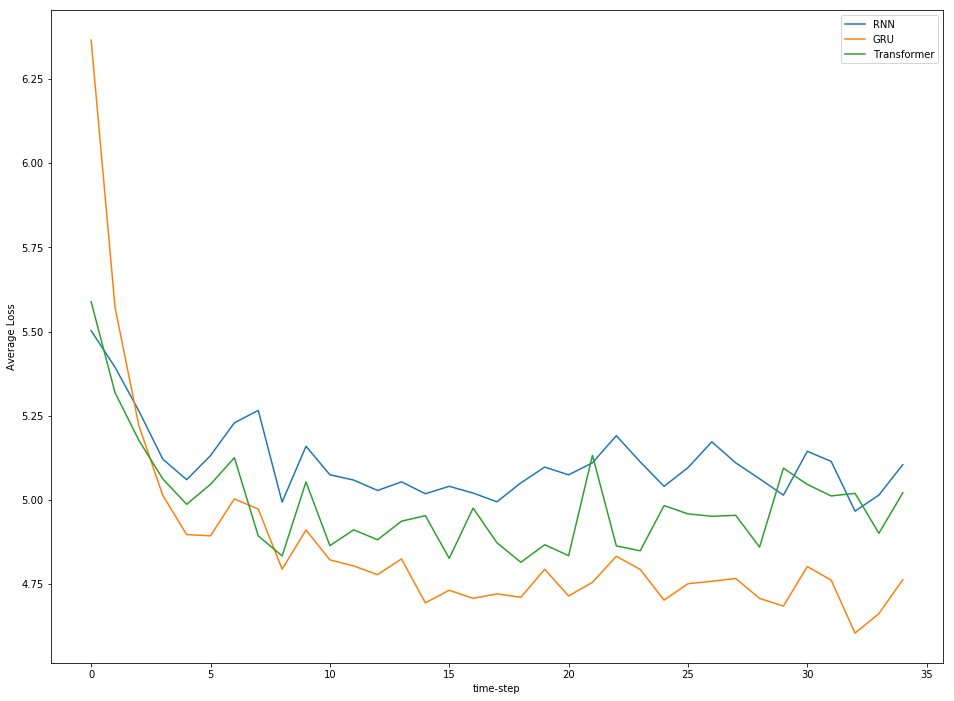

In [314]:
path2="avg_loss"
model1=np.load(path2 + '/avgloss1.npy')[()]
model2=np.load(path2 + '/avgloss2.npy')[()]
model3=np.load(path2 + '/avgloss3.npy')[()]

fig = plt.figure(figsize=(16,12))
# Plot training and validation curve
x = range(0, 35)
plt.plot(x, model1, label='RNN')
plt.plot(x, model2, label='GRU')
plt.plot(x, model3, label='Transformer')

plt.xlabel('time-step')
plt.ylabel('Average Loss')
plt.legend()

plt.show()
fig.savefig('Q5_1.png')